In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle
import numpy as np
from sklearn.model_selection import GridSearchCV
import PySimpleGUI as sg
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# ВКР

## Разведочный анализ

In [2]:
#загружаем датасеты
data_pd1 = pd.read_excel(r"Датасет для ВКР_композиты\X_bp.xlsx")
data_pd2 = pd.read_excel(r"Датасет для ВКР_композиты\X_nup.xlsx")

In [3]:
data_pd1 = data_pd1.drop(['Unnamed: 0'], axis=1)
data_pd2 = data_pd2.drop(['Unnamed: 0'], axis=1)

In [4]:
data_pd = pd.merge(data_pd1, data_pd2, left_index=True, right_index=True, how='inner')

In [5]:
data_pd

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000               220.000000   
1                       3000.000000               220.000000   
2                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

In [6]:
data_pd.shape

(1023, 13)

In [7]:
data_pd.head(5)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                    220.0                   0          4.0               60.0  
2                    220.0                   0          4.0               70.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0

In [8]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки           

In [9]:
data_pd.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [10]:
data_pd.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

In [11]:
data_pd.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [12]:
#проверка данных на шум
noise = np.random.normal(0, 0.2, (1023, 13))
data_with_noise = data_pd + noise
std_dev_data = np.std(data_pd)
std_dev_data_with_noise = np.std(data_with_noise)
print("Стандартное отклонение данных без шума:\n",std_dev_data)
print("Стандартное отклонение данных с шумом:\n", std_dev_data_with_noise)
delta = (std_dev_data_with_noise-std_dev_data)/std_dev_data*100
print("Разница в процентах:\n",delta)

Стандартное отклонение данных без шума:
 Соотношение матрица-наполнитель           0.912776
Плотность, кг/м3                         73.693186
модуль упругости, ГПа                   330.070138
Количество отвердителя, м.%              28.282078
Содержание эпоксидных групп,%_2           2.405125
Температура вспышки, С_2                 40.923244
Поверхностная плотность, г/м2           281.177162
Модуль упругости при растяжении, ГПа      3.117458
Прочность при растяжении, МПа           485.390593
Потребление смолы, г/м2                  59.706727
Угол нашивки, град                       44.993786
Шаг нашивки                               2.562214
Плотность нашивки                        12.344931
dtype: float64
Стандартное отклонение данных с шумом:
 Соотношение матрица-наполнитель           0.927146
Плотность, кг/м3                         73.696948
модуль упругости, ГПа                   330.077876
Количество отвердителя, м.%              28.273312
Содержание эпоксидных групп,%_2      

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Возможно данные Соотношение матрица-наполнитель в какой-то часити искуственно синтезированы. По всем показателям практически не изменились после добавления шума,а здесь рост почти на 3%. 
Если стандатртное отклонение данных увеличивается после добавления шума, это может указывать на наличие шума в данных. 

In [13]:
#заменю данные в столбце, где всего два значения на 1 и 0. Возможно пригодится
data_pd['Угол нашивки, град'] = data_pd['Угол нашивки, град'].replace([90, 0], [1, 0])
# data_pd['Угол нашивки, град'] = data_pd['Угол нашивки, град'].astype('category')
data_pd

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000               220.000000   
1                       3000.000000               220.000000   
2                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

In [14]:
# построю гистограммы распределения
numeric_columns = data_pd.select_dtypes(include=['int64', 'float64']).columns

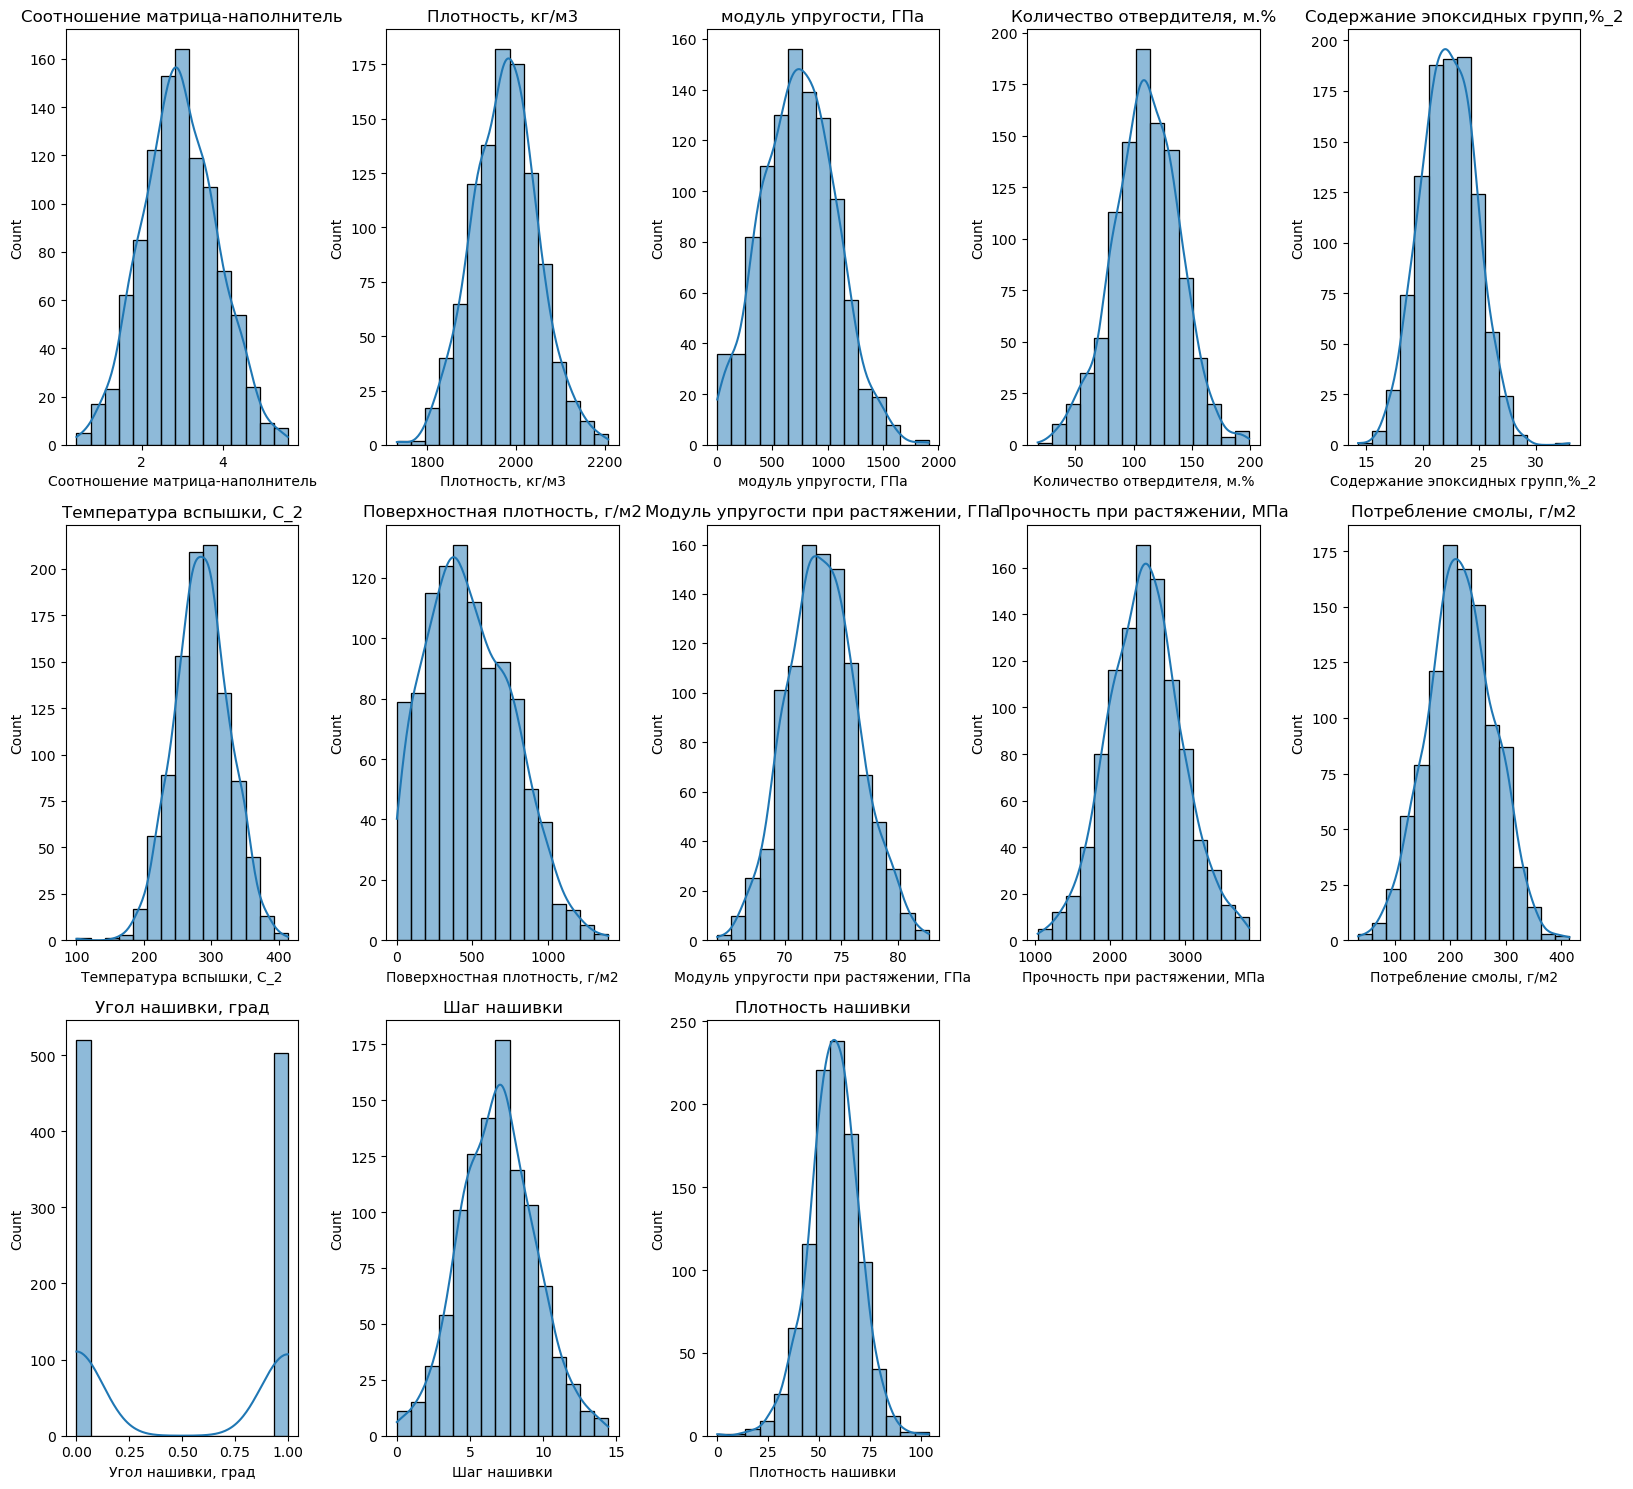

In [15]:
num_plots = len(numeric_columns)

num_cols = 5  # количество графиков в строке
num_rows = math.ceil(num_plots / num_cols)  # количество строк

plt.figure(figsize=(16, 5*num_rows))

for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.histplot(data_pd[column], bins=15, kde=True)
    plt.title(column)

plt.tight_layout()  # автоматический подбор параметров
plt.show()

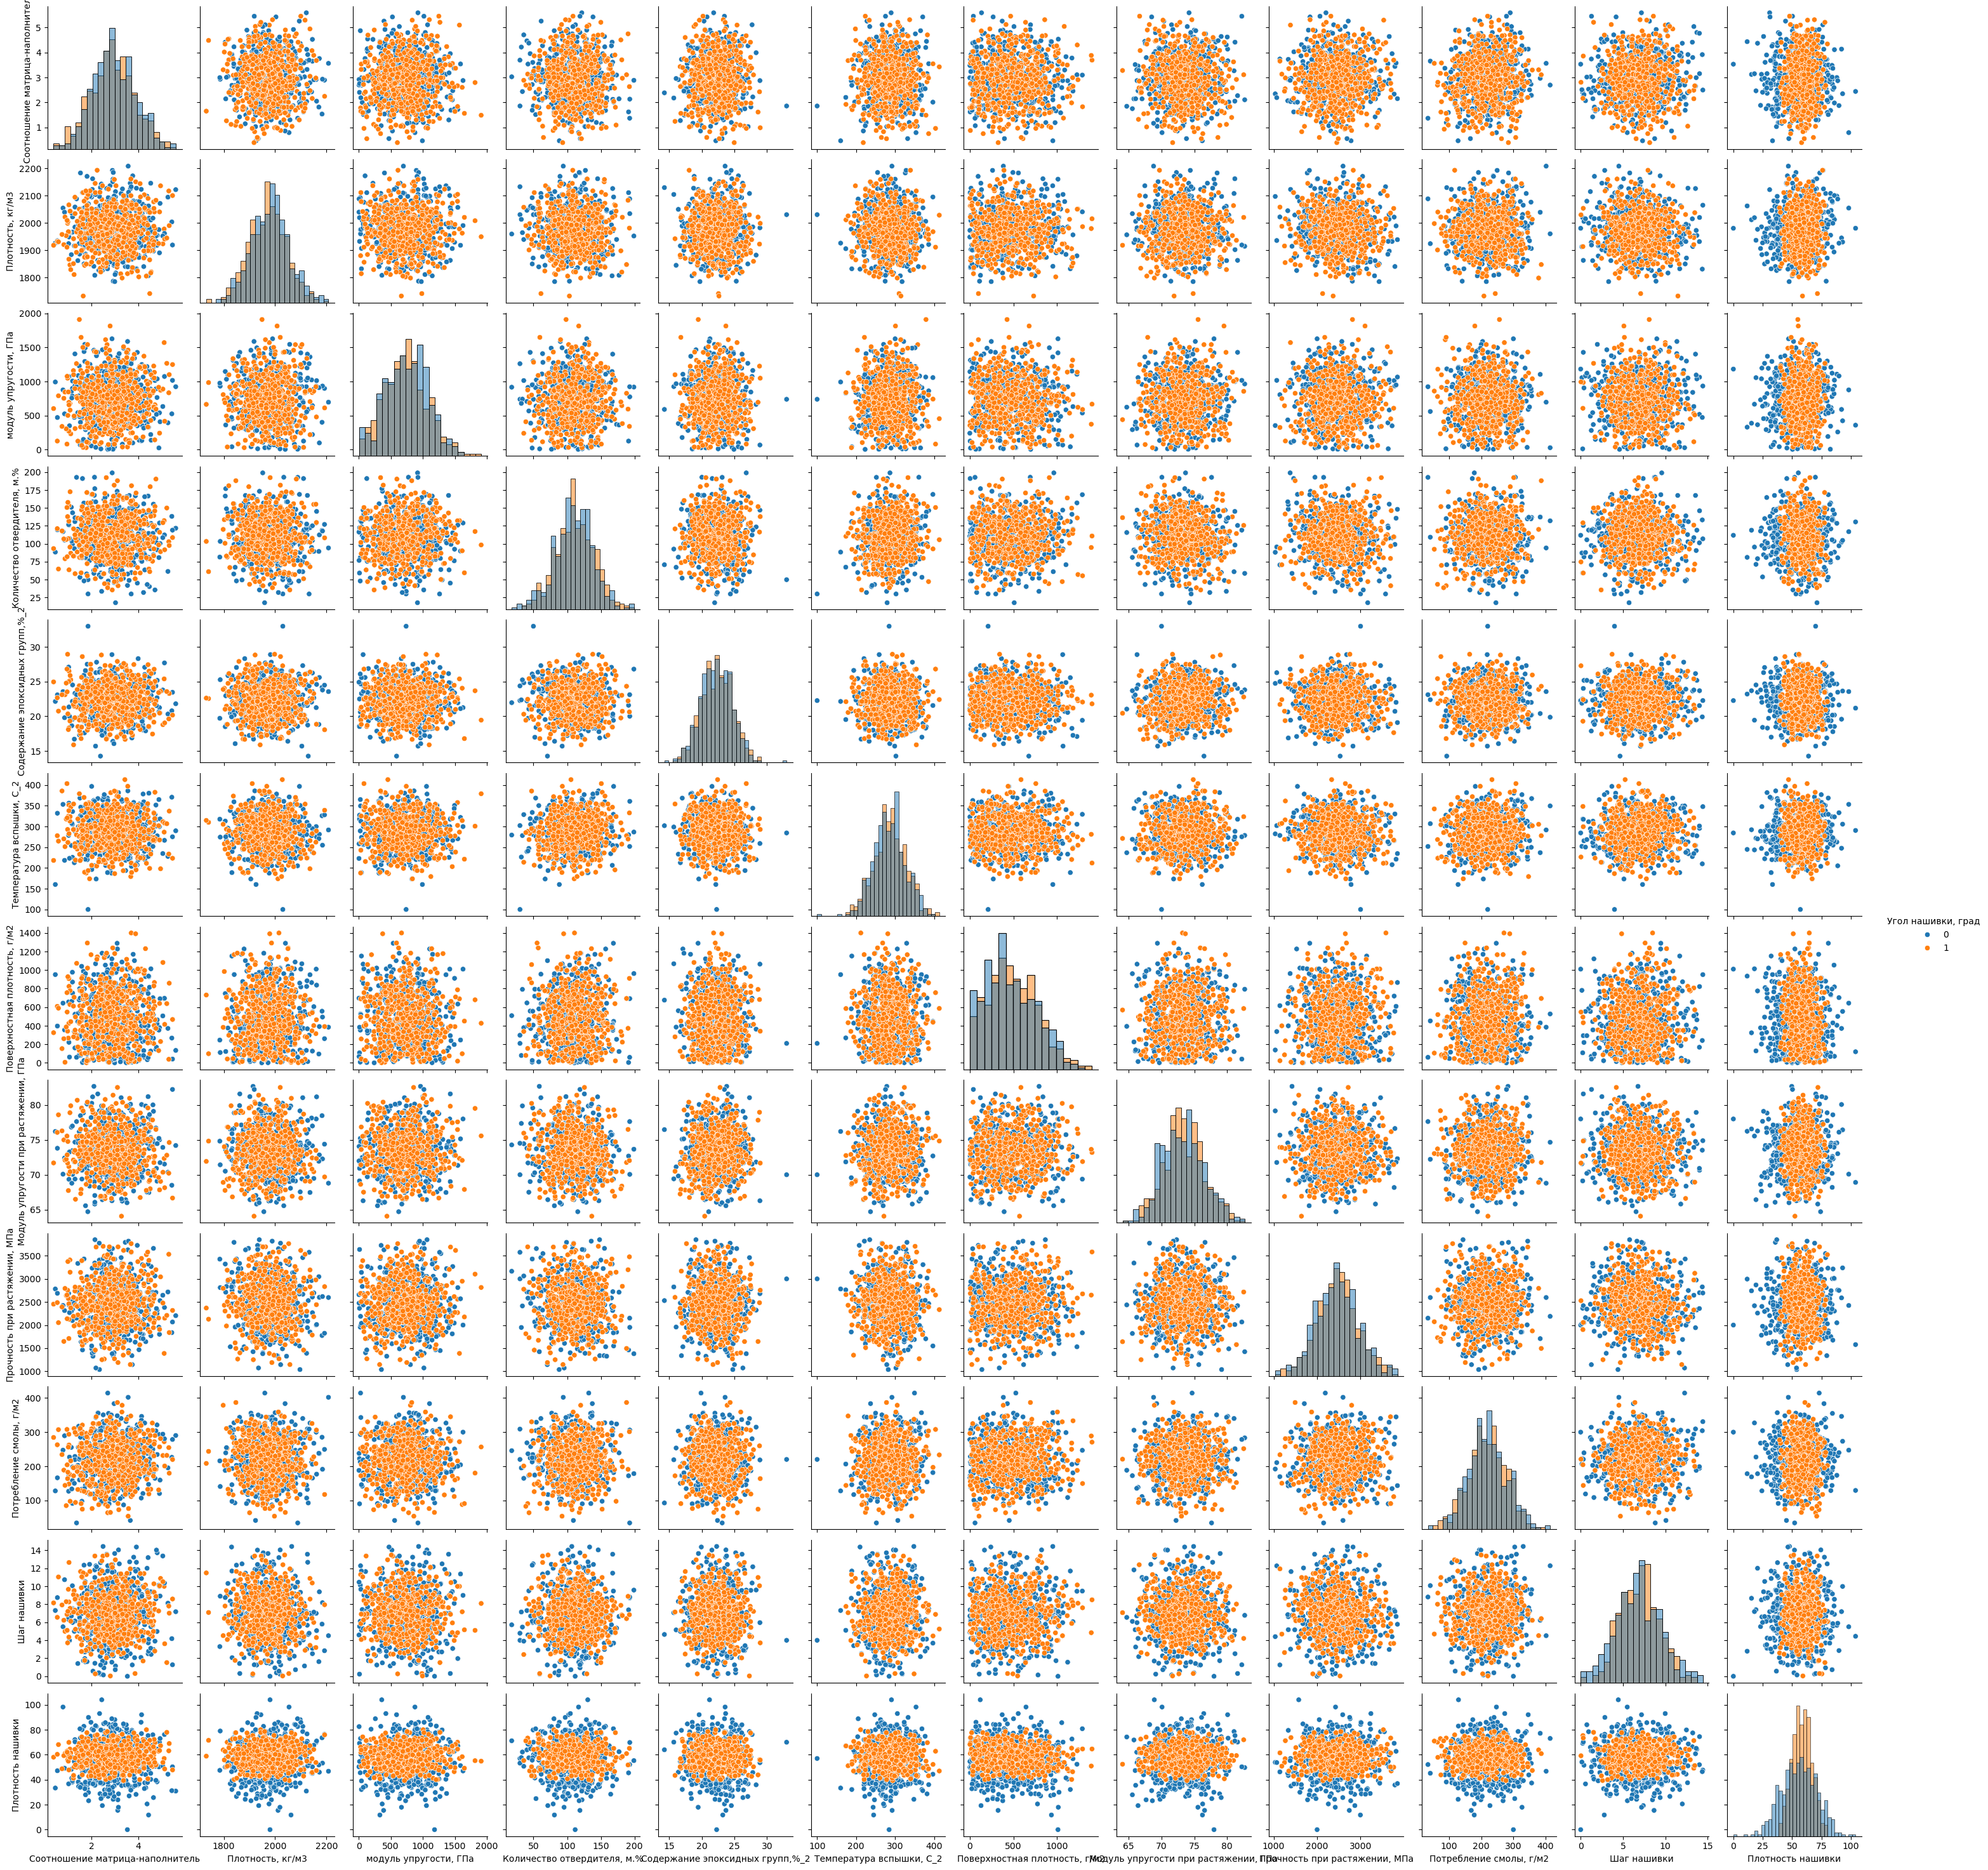

In [16]:
#Построю графики рассеивания, подсвечу угол нашивки, как единственную категориальное значение
sns.pairplot(data_pd[numeric_columns], hue='Угол нашивки, град', diag_kind='hist')
plt.show()

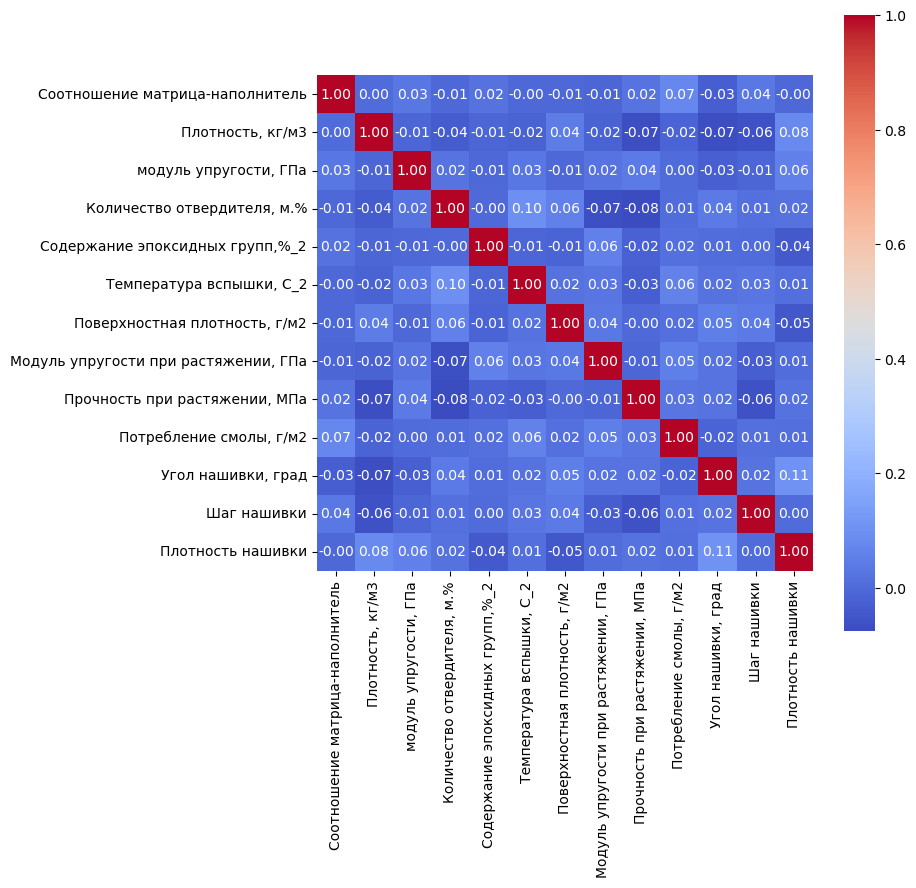

In [17]:
#Посмотрю наличие корреляции на тепловой карте
corr = data_pd.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, square=True, cmap='coolwarm', fmt=".2f")
plt.show()

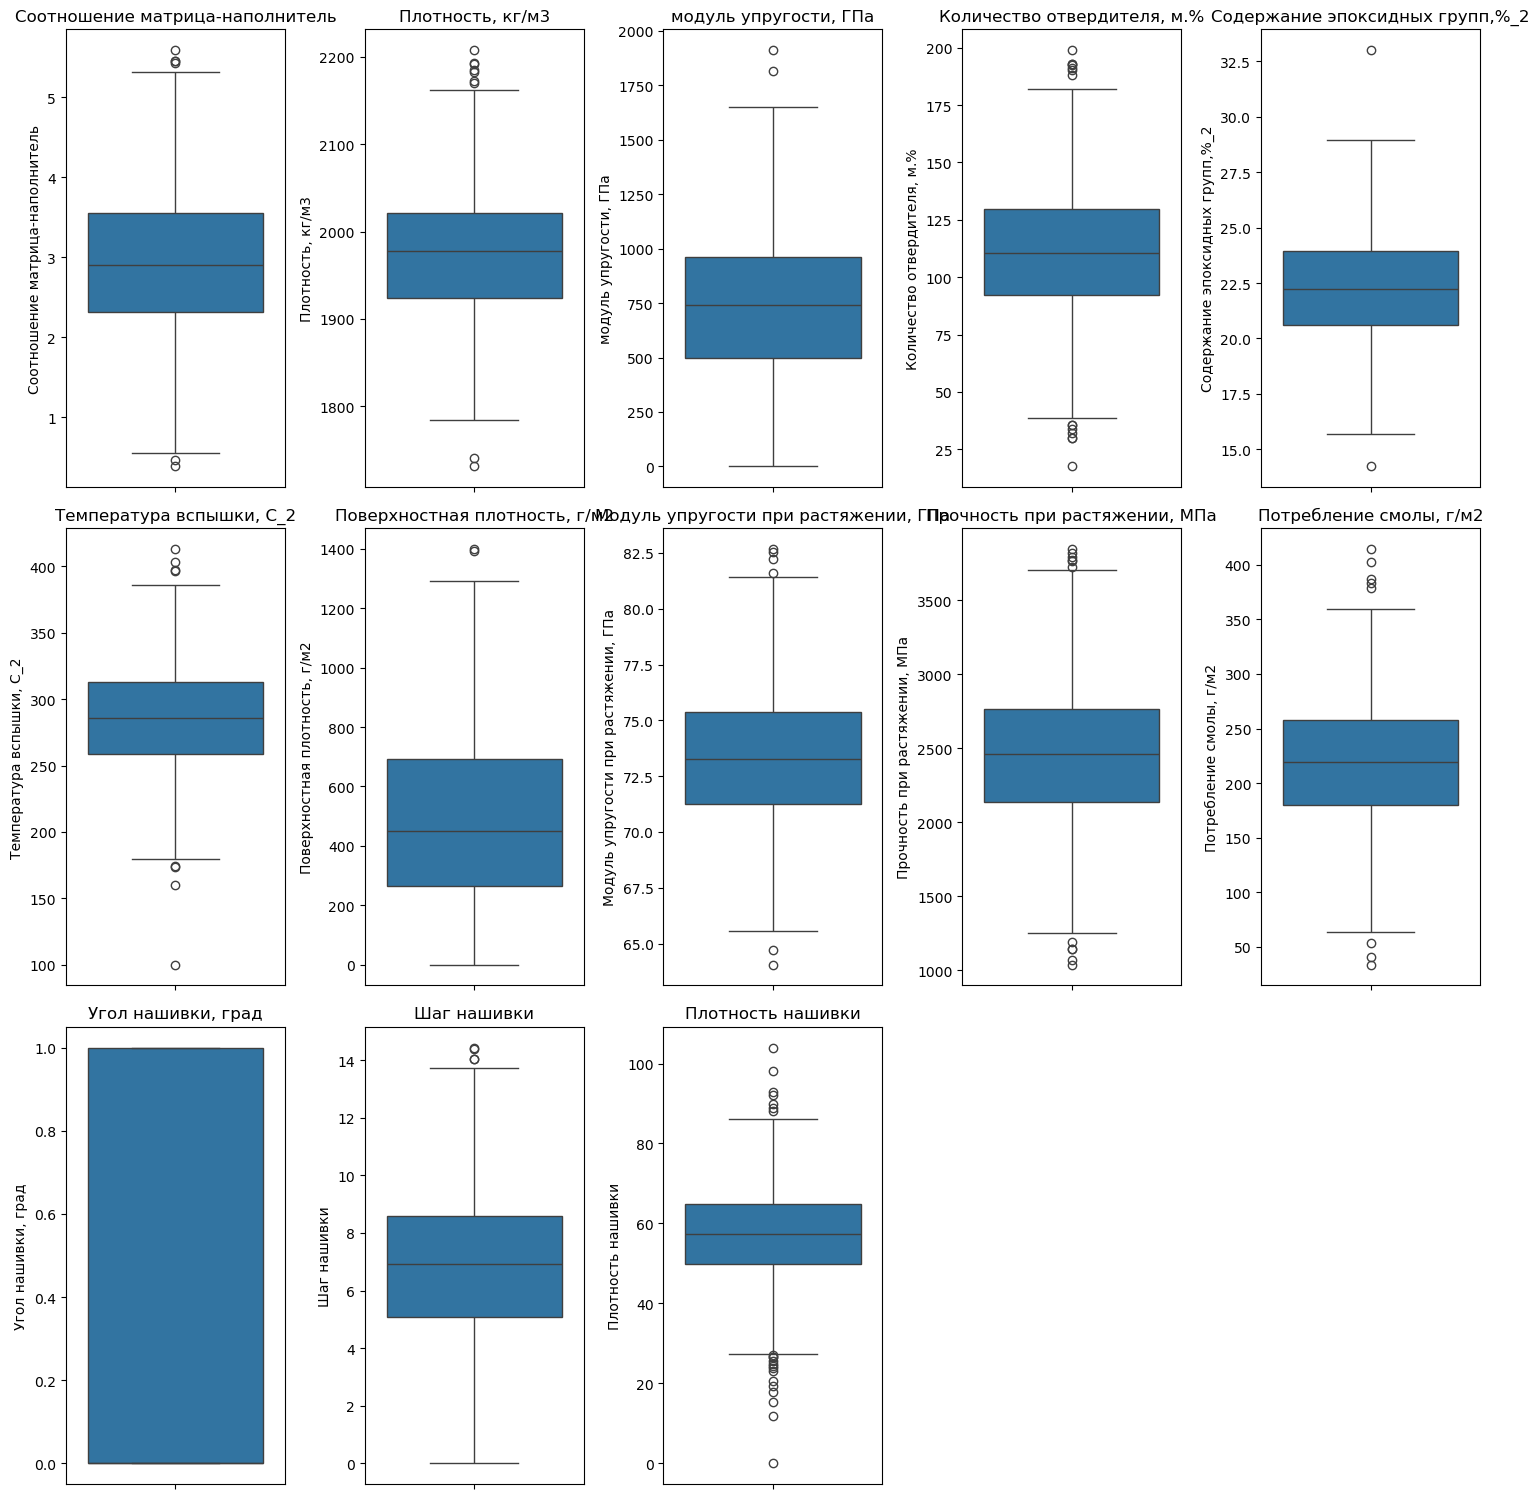

In [18]:
#Проверю выбросы
numeric_cols = data_pd.select_dtypes(include=['int64', 'float64']).columns
num_plots = len(numeric_cols)
# Вычисляем количество строк и столбцов для графиков
num_rows = math.ceil(num_plots/2) 
num_cols = 5

plt.figure(figsize=(15, 5*num_rows))

for i, column in enumerate(numeric_cols):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(y=data_pd[column])
    plt.title(column)

plt.tight_layout()  # автоматический подбор параметров
plt.show()

In [19]:
# Работа с выбросами. Замена на границы усов и удаление
data_pd_pruning = pd.DataFrame()
data_pd_del = pd.DataFrame()

In [20]:
#границы усов - использовать не буду, т.к. модели показали низкие результаты
data_pd_pruning = data_pd.copy()
for col in numeric_columns:
    Q1 = data_pd[col].quantile(0.25)
    Q3 = data_pd[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_pd_pruning[col] = data_pd[col].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)

In [21]:
#Посмотрю сколько выбросов в каждом столбце
z_scores = (data_pd - data_pd.mean()) / data_pd.std()
out_count = (z_scores.abs() > 3).sum()

for column, count in out_count.items():
    print(f"{count} выбросов в признаке {column}")

total_out = out_count.sum()
print(f'Всего {total_out} выбросов')


0 выбросов в признаке Соотношение матрица-наполнитель
3 выбросов в признаке Плотность, кг/м3
2 выбросов в признаке модуль упругости, ГПа
2 выбросов в признаке Количество отвердителя, м.%
2 выбросов в признаке Содержание эпоксидных групп,%_2
3 выбросов в признаке Температура вспышки, С_2
2 выбросов в признаке Поверхностная плотность, г/м2
0 выбросов в признаке Модуль упругости при растяжении, ГПа
0 выбросов в признаке Прочность при растяжении, МПа
3 выбросов в признаке Потребление смолы, г/м2
0 выбросов в признаке Угол нашивки, град
0 выбросов в признаке Шаг нашивки
7 выбросов в признаке Плотность нашивки
Всего 24 выбросов


In [22]:
#Удалю выбросы, т.к. они распределены равномерно по столцам и не должны повлиять на дальнейшие исследования
data_pd_del = data_pd.copy()

for col in numeric_columns:
    Q1 = data_pd[col].quantile(0.25)
    Q3 = data_pd[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_pd_del = data_pd_del[(data_pd_del[col] > lower_bound) & (data_pd_del[col] < upper_bound)]

In [23]:
data_pd_del.shape

(936, 13)

In [24]:
data_pd_del

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
5                            2.767918       2000.000000   
6                            2.569620       1910.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                738.736842                    50.000000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
5                748.000000                   111.860000   
6                807.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                           23.750000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
5                           22.267857                284.615385   
6                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
5                        210.000000                             70.000000   
6                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
5                       3000.000000               220.000000   
6                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                 

## Предобработка данных

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

In [26]:
col_pred = ['Модуль упругости при растяжении, ГПа']
# col_pred = ['Прочность при растяжении, МПа']

Бутстрэп - это статистический метод, который позволяет оценить множество метрик, таких как среднее, медиана, стандартное отклонение, и т.д. Он работает путем случайного выбора с заменой наблюдений из  датасета и создания нового датасета такого же размера. Этот процесс повторяется много раз для создания множества бутстрэп-выборок. Затем я пробую обучить модель на каждой из этих выборок и усреднить результаты.

In [27]:
from sklearn.utils import resample
# создаем бутстрэп-выборку
bootstrap_sample = resample(data_pd_del, replace=True, n_samples=len(data_pd_del), random_state=1)

In [28]:
#ради экперимента попробовал повторить 2 раза
bootstrap_sample = resample(bootstrap_sample, replace=True, n_samples=len(bootstrap_sample), random_state=1)
bootstrap_sample = resample(bootstrap_sample, replace=True, n_samples=len(bootstrap_sample), random_state=1)

In [29]:
data_pd_del

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
5                            2.767918       2000.000000   
6                            2.569620       1910.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                738.736842                    50.000000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
5                748.000000                   111.860000   
6                807.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                           23.750000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
5                           22.267857                284.615385   
6                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
5                        210.000000                             70.000000   
6                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
5                       3000.000000               220.000000   
6                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                 

перезаписываю данные в data_pd_del из bootstrap_sample, т.к. на оригинальных данных расчетов удовлетворяющих поставленой задаче не выявлено. Слишком большая среднеквадратичная ошибки, и R2 отрицательный

In [30]:
data_pd_del = bootstrap_sample.copy()

In [31]:
def normalized(data_pd_del, col_pred):
    standart_customer_id = data_pd_del.copy() 
    standart_customer_id = standart_customer_id.drop(col_pred, axis = 1)
    columns1 = standart_customer_id.columns
    scaler1 = StandardScaler()
    standart_customer_id[columns1] = scaler1.fit_transform(standart_customer_id)

    normal_customer_id = data_pd_del.copy()
    normal_customer_id = normal_customer_id.drop(col_pred, axis = 1)
    columns2 = normal_customer_id.columns
    scaler2 = Normalizer()
    normal_customer_id[columns2] = scaler2.fit_transform(normal_customer_id)
  
    minmax_customer_id = data_pd_del.copy()  # Создаем копию исходного DataFrame
    minmax_customer_id = minmax_customer_id.drop(col_pred, axis = 1)
    columns3 = minmax_customer_id.columns
    scaler3 = MinMaxScaler()
    minmax_customer_id[columns3] = scaler3.fit_transform(minmax_customer_id)
  
    return standart_customer_id, normal_customer_id, minmax_customer_id
        

In [32]:
#Проведу стандартизацию с StandardScaler, Normalizer, MinMaxScaler
standart_customer_id, normal_customer_id, minmax_customer_id = normalized(data_pd_del, col_pred)

### Normalizer

## Тестирование моделей

In [38]:
df = pd.DataFrame()
df = normal_customer_id.copy(deep=True)

In [39]:
print(col_pred)
print('Линейная регрессия')
mae, mse, rmse, mape, r2 = lgr(df, data_pd_del, col_pred)
print('Случайный лес')
mae, mse, rmse, mape, r2 = rf(df, data_pd_del, col_pred)
print('Градиентный бустинг')
mae, mse, rmse, mape, r2 = grboos(df, data_pd_del, col_pred)

['Модуль упругости при растяжении, ГПа']
Линейная регрессия
MAE: 2.242
MSE: 7.585
RMSE: 2.754
MAPE: 3.062
R2: 0.034
Случайный лес
MAE: 0.803
MSE: 2.088
RMSE: 1.445
MAPE: 1.091
R2: 0.734
Градиентный бустинг
MAE: 0.555
MSE: 1.908
RMSE: 1.381
MAPE: 0.750
R2: 0.757


In [ ]:
print(col_pred)
print('Линейная регрессия')
mae, mse, rmse, mape, r2 = lgr(df, data_pd_del, col_pred)
print('Случайный лес')
mae, mse, rmse, mape, r2 = rf(df, data_pd_del, col_pred)
print('Градиентный бустинг')
mae, mse, rmse, mape, r2 = grboos(df, data_pd_del, col_pred)

### StandardScaler

In [40]:
df = pd.DataFrame()
df = standart_customer_id.copy(deep=True)
# col_pred = ['Модуль упругости при растяжении, ГПа']

In [41]:
print(col_pred)
print('Линейная регрессия')
mae, mse, rmse, mape, r2 = lgr(df, data_pd_del, col_pred)
print('Случайный лес')
mae, mse, rmse, mape, r2 = rf(df, data_pd_del, col_pred)
print('Градиентный бустинг')
mae, mse, rmse, mape, r2 = grboos(df, data_pd_del, col_pred)

['Модуль упругости при растяжении, ГПа']
Линейная регрессия
MAE: 2.278
MSE: 7.763
RMSE: 2.786
MAPE: 3.114
R2: 0.011
Случайный лес
MAE: 0.802
MSE: 2.104
RMSE: 1.451
MAPE: 1.089
R2: 0.732
Градиентный бустинг
MAE: 0.641
MSE: 2.278
RMSE: 1.509
MAPE: 0.864
R2: 0.710


### MinMaxScaler

In [42]:
df = pd.DataFrame()
df = minmax_customer_id.copy(deep=True)

In [43]:
print(col_pred)
print('Линейная регрессия')
mae, mse, rmse, mape, r2 = lgr(df, data_pd_del, col_pred)
print('Случайный лес')
mae, mse, rmse, mape, r2 = rf(df, data_pd_del, col_pred)
print('Градиентный бустинг')
mae, mse, rmse, mape, r2 = grboos(df, data_pd_del, col_pred)

['Модуль упругости при растяжении, ГПа']
Линейная регрессия
MAE: 2.278
MSE: 7.763
RMSE: 2.786
MAPE: 3.114
R2: 0.011
Случайный лес
MAE: 0.802
MSE: 2.104
RMSE: 1.451
MAPE: 1.089
R2: 0.732
Градиентный бустинг
MAE: 0.647
MSE: 2.278
RMSE: 1.509
MAPE: 0.872
R2: 0.710


## Линейная регрессия

In [35]:
# Линейная регрессия
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def lgr(df, data_pd_del, col_pred):
    X = df
    y = data_pd_del[col_pred]
    # y = y.values.ravel()
    # разделяем на тренировочный и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=True, random_state=42)
    
    # создаем и обучаем модель
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # делаем предсказания
    y_pred = model.predict(X_test)
    
    # оцениваем модель
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((np.array(y_test) - np.array(y_pred)) / (np.array(y_test)+1e-10))) * 100
    r2 = r2_score(y_test, y_pred)
    
    print(f'MAE: {mae:.3f}')
    print(f'MSE: {mse:.3f}')
    print(f'RMSE: {rmse:.3f}')
    print(f'MAPE: {mape:.3f}')
    print(f'R2: {r2:.3f}')
    return mae, mse, rmse, mape, r2

## Случайный лес

In [36]:
# Случайный лес
from sklearn.ensemble import RandomForestRegressor

# создаем и обучаем модель

def rf(df, data_pd_del, col_pred):
    # X = df.drop(col_pred, axis=1)
    X = df
    y = data_pd_del[col_pred]
    y = y.values.ravel()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

    model = RandomForestRegressor(n_estimators=200, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    # оцениваем модель
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((np.array(y_test) - np.array(y_pred)) / (np.array(y_test)+1e-10))) * 100
    r2 = r2_score(y_test, y_pred)
    print(f'MAE: {mae:.3f}')
    print(f'MSE: {mse:.3f}')
    print(f'RMSE: {rmse:.3f}')
    print(f'MAPE: {mape:.3f}')
    print(f'R2: {r2:.3f}')
    return mae, mse, rmse, mape, r2

## Градиентный бустинг

In [44]:
# Градиентный бустинг
from sklearn.ensemble import GradientBoostingRegressor

def grboos(df, data_pd_del, col_pred):
    X = df
    y = data_pd_del[col_pred]
    y = y.values.ravel()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
   
    model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.2, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    with open('mod_uprug.pkl', 'wb') as file:
        pickle.dump(model, file)
    # оцениваем модель
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((np.array(y_test) - np.array(y_pred)) / (np.array(y_test)+1e-10))) * 100
    r2 = r2_score(y_test, y_pred)
    print(f'MAE: {mae:.3f}')
    print(f'MSE: {mse:.3f}')
    print(f'RMSE: {rmse:.3f}')
    print(f'MAPE: {mape:.3f}')
    print(f'R2: {r2:.3f}')
    return mae, mse, rmse, mape, r2


## Подбор параметров

In [45]:
## попробовал удалить "подозреваемый показатель" на синтетичекое происхождени - не помогло. 
# normal_customer_id = normal_customer_id.drop('Соотношение матрица-наполнитель', axis=1)
# normal_customer_id = normal_customer_id.drop(col_pred, axis = 1)
# columns = normal_customer_id.columns
# normal_customer_id[columns] = scaler.fit_transform(normal_customer_id)
# normal_customer_id

df = pd.DataFrame()
df = standart_customer_id.copy(deep=True)


from sklearn.model_selection import GridSearchCV

# X = df.drop(col_pred, axis=1)
X = df
y = data_pd_del[col_pred]
y = y.values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=True, random_state=42)


# Определяем сетку гиперпараметров
param_grid = {
    'n_estimators': [50, 100, 150, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 1, 1.5],
    
}

# объект GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=10,  # количество блоков для перекрестной проверки
                           scoring='neg_mean_squared_error',  # метрика, которую хотим оптимизировать
                           n_jobs=1  # ядра процессора для более быстрого вычисления
                          )

# поиск гиперпараметров, обучив модель на данных
grid_search.fit(X_train, y_train)

# выведем наилучшие гиперпараметры
print(f'Best parameters: {grid_search.best_params_}')

# Выведем наилучшую модель
best_model = grid_search.best_estimator_

# предскажем значения на тестовых данных с помощью наилучшей модели
y_pred = best_model.predict(X_test)


# качество модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((np.array(y_test) - np.array(y_pred)) / (np.array(y_test)+1e-10))) * 100
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae:.3f}')
print(f'MSE: {mse:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'MAPE: {mape:.3f}')
print(f'R2: {r2:.3f}')

Best parameters: {'learning_rate': 0.2, 'n_estimators': 300}
MAE: 0.641
MSE: 2.278
RMSE: 1.509
MAPE: 0.864
R2: 0.710


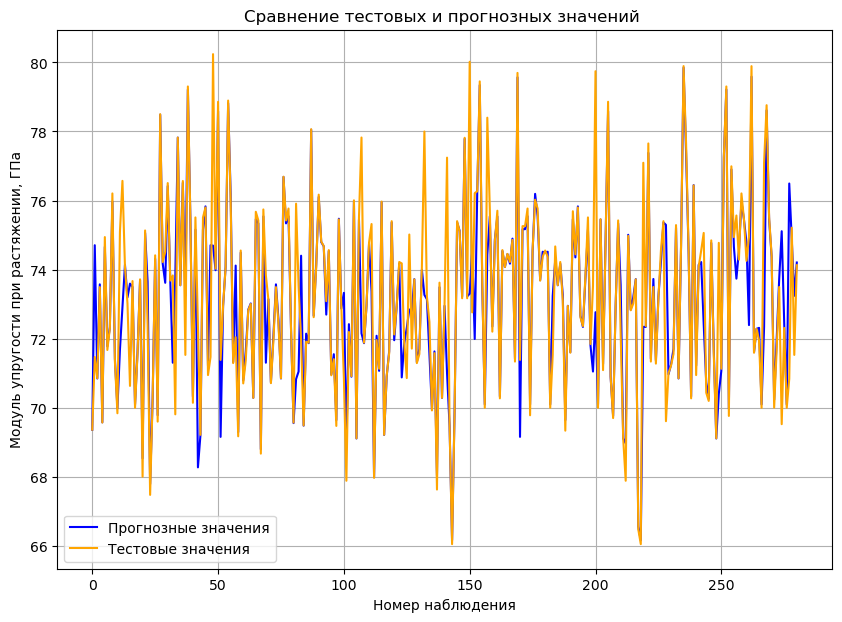

In [46]:
# Настройка параметров графика
plt.figure(figsize=(10, 7))
plt.title("Сравнение тестовых и прогнозных значений ")

# Построение графиков для прогнозных и тестовых значений
plt.plot(y_pred, label="Прогнозные значения", color='blue')
plt.plot(y_test, label="Тестовые значения", color='orange')

# Настройка подписей осей
plt.xlabel("Номер наблюдения")
plt.ylabel("Модуль упругости при растяжении, ГПа")

# Добавление легенды и сетки
plt.legend()
plt.grid(True)

Бутстрэп - это статистический метод, который позволяет оценить множество метрик, таких как среднее, медиана, стандартное отклонение, и т.д. Он работает путем случайного выбора с заменой наблюдений из  датасета и создания нового датасета такого же размера. Этот процесс повторяется много раз для создания множества бутстрэп-выборок. Затем я пробую обучить модель на каждой из этих выборок и усреднить результаты.

In [47]:
from sklearn.utils import resample
# создаем бутстрэп-выборку
bootstrap_sample = resample(data_pd_del, replace=True, n_samples=len(data_pd_del), random_state=1)

In [48]:
col_pred_nero = ['Соотношение матрица-наполнитель']
scaler = MinMaxScaler()
normalized_customer_nero = data_pd_del.copy()  # Создаем копию исходного DataFrame
normalized_customer_nero = normalized_customer_nero.drop(col_pred_nero, axis = 1)
columns = normalized_customer_nero.columns
normalized_customer_nero[columns] = scaler.fit_transform(normalized_customer_nero)
normalized_customer_nero

Плотность, кг/м3  модуль упругости, ГПа  Количество отвердителя, м.%  \
421          0.602456               0.339922                     0.334230   
116          0.903578               0.516273                     0.563461   
578          0.566814               0.443817                     0.402953   
176          0.857580               0.203161                     0.227121   
716          0.524589               0.374578                     0.641680   
..                ...                    ...                          ...   
363          0.323276               0.018933                     0.589222   
409          0.476593               0.347191                     0.500913   
162          0.223343               0.697194                     0.717524   
613          0.463130               0.135347                     0.409921   
713          0.611793               0.373960                     0.579628   

     Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
421                         0.431390                  0.739487   
116                         0.444724                  0.187035   
578                         0.498421                  0.622498   
176                         0.564764                  0.451355   
716                         0.721654                  0.423654   
..                               ...                       ...   
363                         0.581598                  0.435102   
409                         0.596168                  0.451664   
162                         0.186823                  0.482734   
613                         0.627974                  0.632851   
713                         0.690949                  0.422707   

     Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
421                       0.203947                              0.624529   
116                       0.209070                              0.265631   
578                       0.549168                              0.583735   
176                       0.081251                              0.369753   
716                       0.411970                              0.498284   
..                             ...                                   ...   
363                       0.030382                              0.420607   
409                       0.681161                              0.465351   
162                       0.905899                              0.538198   
613                       0.355885                              0.437673   
713                       0.157589                              0.382820   

     Прочность при растяжении, МПа  Потребление смолы, г/м2  \
421                       0.197876                 0.603660   
116                       0.690033                 0.231478   
578                       0.147665                 0.769445   
176                       0.563778                 0.389690   
716                       0.591851                 0.696316   
..                             ...                      ...   
363                       0.286516                 0.503178   
409                       0.214918                 0.263175   
162                       0.416213                 0.479975   
613                       0.750528                 0.395185   
713                       0.600879                 0.457253   

     Угол нашивки, град  Шаг нашивки  Плотность нашивки  
421                 0.0     0.627743           0.666881  
116                 0.0     0.403243           0.737630  
578                 1.0     0.690727           0.739474  
176                 0.0     0.298784           0.943825  
716                 1.0     0.670165           0.302488  
..                  ...          ...                ...  
363                 0.0     0.363186           0.191909  
409                 0.0     0.680704           0.871022  
162                 0.0     0.419762           0.769134  
613                 1.0     0.393512 

In [ ]:
#Сохранял для программы
# data_pd.to_excel(r'test_prog.xlsx', startrow=0, startcol=0, index=False)
# data_pd.to_excel(r'наборКомп.xlsx', startrow=0, startcol=0, index=False)
# data_pd.describe().T.to_excel(r'статистика.xlsx', startrow=0, startcol=0, index=True)

## Предсказание нейросетью

Epoch 1/30


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/21 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - loss: 9.2887 - mse: 9.2887
Epoch 1: val_mse improved from inf to 1.22468, saving model to my_model_2024.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 5.8426 - mse: 5.8426 - val_loss: 1.2247 - val_mse: 1.2247
Epoch 2/30
 1/21 ━━━━━━━━━━━━━━━━━━━━ 5s 265ms/step - loss: 1.2539 - mse: 1.2539
Epoch 2: val_mse improved from 1.22468 to 0.73122, saving model to my_model_2024.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0710 - mse: 1.0710 - val_loss: 0.7312 - val_mse: 0.7312
Epoch 3/30
 1/21 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.6902 - mse: 0.6902
Epoch 3: val_mse did not improve from 0.73122
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7848 - mse: 0.7848 - val_loss: 0.7530 - val_mse: 0.7530
Epoch 4/30
 1/21 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.7468 - mse: 0.7468
Epoch 4: val_mse improved from 0.73122 to 0.72112, saving model to my_model_2024.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7037 - mse: 0.7037 - va

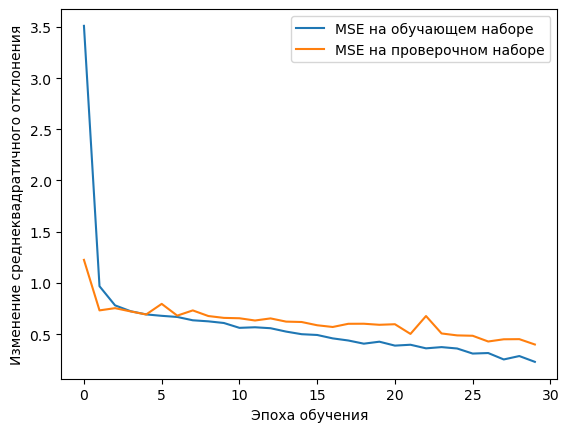

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
MAE: 0.451
MSE: 0.398
RMSE: 0.631
MAPE: 18.209
R2: 0.445


In [49]:
import tensorflow as tf
from keras.callbacks import ModelCheckpoint

# Разделение данных на признаки и целевую переменную
X = normalized_customer_nero
y = data_pd_del[col_pred_nero]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# Создание модели нейронной сети
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
model_save_path = r'my_model_2024.keras'

checkpoint_callback_model = ModelCheckpoint(model_save_path, 
                                      monitor='val_mse',
                                      save_best_only=True,
                                      verbose=1)
history = model.fit(X_train, 
          y_train, 
          epochs=30, 
          batch_size=32, 
          validation_data=(X_test, y_test),
          callbacks=[checkpoint_callback_model])


plt.plot(history.history['mse'], 
         label='MSE на обучающем наборе')
plt.plot(history.history['val_mse'], 
         label='MSE на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Изменение среднеквадратичного отклонения')
plt.legend()
plt.show()



# Загрузка лучшей модели
best_model = tf.keras.models.load_model('my_model_2024.keras')

# Получение прогнозов от лучшей модели
y_pred = best_model.predict(X_test)

# оцениваем модель
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((np.array(y_test) - np.array(y_pred)) / (np.array(y_test)+1e-10))) * 100
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.3f}')
print(f'MSE: {mse:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'MAPE: {mape:.3f}')
print(f'R2: {r2:.3f}')

Epoch 1/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 7.4388 - mse: 7.4388 - val_loss: 1.7704 - val_mse: 1.7704
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4279 - mse: 1.4279 - val_loss: 0.7720 - val_mse: 0.7720
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8670 - mse: 0.8670 - val_loss: 0.7703 - val_mse: 0.7703
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8356 - mse: 0.8356 - val_loss: 0.7416 - val_mse: 0.7416
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8060 - mse: 0.8060 - val_loss: 0.7504 - val_mse: 0.7504
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7002 - mse: 0.7002 - val_loss: 0.7847 - val_mse: 0.7847
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7357 - mse: 0.7357 - val_loss: 0.7284 - val_mse: 0.7284
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6732 - mse: 0.6732 - val_loss: 0.7171 - val_mse: 0.7171
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6843 - mse: 0.6843 - v

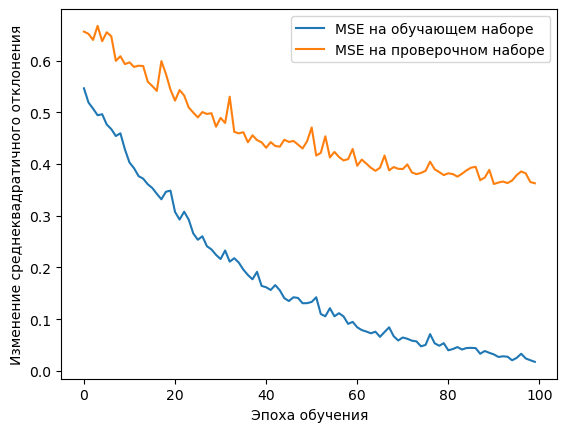

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
MAE: 0.298
MSE: 0.361
RMSE: 0.601
MAPE: 11.945
R2: 0.497


In [50]:
#Вариант на керас

from keras.models import Sequential
from keras.layers import Dense


# Разделение данных на признаки и целевую переменную
X = normalized_customer_nero
y = data_pd_del[col_pred_nero]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

model = Sequential()
# Входной слой
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu')) 
# Скрытые слои
model.add(Dense(64, activation='relu')) 
model.add(Dense(64, activation='relu')) 
model.add(Dense(32, activation='relu')) 
# Выходной слой
model.add(Dense(1))

# Компиляция модели
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# Обучение модели
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test, y_test))


checkpoint_callback_model = ModelCheckpoint(model_save_path, 
                                      monitor='val_mse',
                                      save_best_only=True,
                                      verbose=1)
history = model.fit(X_train, 
          y_train, 
          epochs=100, 
          batch_size=32, 
          validation_data=(X_test, y_test),
          callbacks=[checkpoint_callback_model])


plt.plot(history.history['mse'], 
         label='MSE на обучающем наборе')
plt.plot(history.history['val_mse'], 
         label='MSE на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Изменение среднеквадратичного отклонения')
plt.legend()
plt.show()



# Загрузка лучшей модели
best_model = tf.keras.models.load_model('my_model_2024.keras')

# Получение прогнозов от лучшей модели
y_pred = best_model.predict(X_test)

# оцениваем модель
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((np.array(y_test) - np.array(y_pred)) / (np.array(y_test)+1e-10))) * 100
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.3f}')
print(f'MSE: {mse:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'MAPE: {mape:.3f}')
print(f'R2: {r2:.3f}')

In [ ]:
#Вариант смешивания категариальных и числовых данных
# from keras.models import Model
# from keras.layers import Input, Dense, Embedding, Flatten, Concatenate

# # Предположим, у нас есть 5 числовых признака и 3 категориальных признака
# num_inputs = Input(shape=(5,))
# cat_inputs = Input(shape=(3,))

# # Обработка числовых данных
# num_layer = Dense(32, activation='relu')(num_inputs)

# # Обработка категориальных данных
# # Для примера, предположим, что каждый категориальный признак может принимать 10 различных значений
# cat_layer = Embedding(input_dim=10, output_dim=4)(cat_inputs)
# cat_layer = Flatten()(cat_layer)

# # Объединение числовых и категориальных данных
# combined = Concatenate()([num_layer, cat_layer])

# # Добавление дополнительных слоев
# dense = Dense(32, activation='relu')(combined)
# output = Dense(1)(dense)

# # Создание модели
# model = Model(inputs=[num_inputs, cat_inputs], outputs=output)

# # Компиляция модели
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# # Обучение модели
# # Предположим, что X_num_train и X_cat_train - это обучающие данные для числовых и категориальных признаков соответственно
# model.fit([X_num_train, X_cat_train], y_train, epochs=50, batch_size=32, verbose=1)

## Графический интерфейс

In [51]:
#графический интерфес
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import GridSearchCV
import PySimpleGUI as sg
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.utils import resample



def load_dataframe(filepath):
    df = pd.read_excel(rf'{filepath}')
    return df

def update(data_pd, column):
    # функция обучения модели на основе выбранной колонки
    numeric_columns = data_pd.select_dtypes(include=['int64', 'float64']).columns
    data_pd_del = pd.DataFrame()
    for col in numeric_columns:
        Q1 = data_pd[col].quantile(0.25)
        Q3 = data_pd[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data_pd_del = data_pd[(data_pd[col] > lower_bound) & (data_pd[col] < upper_bound)]



    
    
    bootstrap_sample = resample(data_pd_del, replace=True, n_samples=len(data_pd_del), random_state=1)
    bootstrap_sample = resample(bootstrap_sample, replace=True, n_samples=len(bootstrap_sample), random_state=1)
    bootstrap_sample = resample(bootstrap_sample, replace=True, n_samples=len(bootstrap_sample), random_state=1)
    data_pd_del = bootstrap_sample.copy()
    
    minmax_customer_id = data_pd_del.copy()  
    minmax_customer_id = minmax_customer_id.drop(column, axis = 1)
    columns3 = minmax_customer_id.columns
    scaler3 = MinMaxScaler()
    minmax_customer_id[columns3] = scaler3.fit_transform(minmax_customer_id)
    
    
    
    if column == 'Соотношение матрица-наполнитель':
        mae = 0.000000000
        mse = 0.000000000
        rmse = 0.000000000
        mape = 0.000000000
        r2 = 0.000000000
        return mae, mse, rmse, mape, r2 
           
    
    if column == 'Модуль упругости при растяжении, ГПа':
        X = minmax_customer_id
        y = data_pd_del[column]
        y = y.values.ravel()
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
   
        model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.2, random_state=42)
        model.fit(X_train, y_train)
    
        y_pred = model.predict(X_test)
        with open('mod_uprug.pkl', 'wb') as file:
            pickle.dump(model, file)
        
                
        
        
        # оцениваем модель
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((np.array(y_test) - np.array(y_pred)) / (np.array(y_test)+1e-10))) * 100
        r2 = r2_score(y_test, y_pred)
            
        return mae, mse, rmse, mape, r2
        
    if column == 'Прочность при растяжении, МПа':
        X = minmax_customer_id
        y = data_pd_del[column]
        y = y.values.ravel()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
   
        model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.2, random_state=42)
        model.fit(X_train, y_train)
    
        y_pred = model.predict(X_test)
        with open('mod_uprug.pkl', 'wb') as file:
            pickle.dump(model, file)
        
        # оцениваем модель
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((np.array(y_test) - np.array(y_pred)) / (np.array(y_test)+1e-10))) * 100
        r2 = r2_score(y_test, y_pred)
        return mae, mse, rmse, mape, r2

    pass

layout = [[sg.Text('Обучение моделей для предсказаний:', size=(70, 3), font='Helvetica 16')],
          [sg.Input('путь до файла', key='-FILE-',), sg.FileBrowse()],
          [sg.Text('Выберите столбец для предсказания:')],
          [sg.Combo(values=[], key='-COLUMN-', size=(60, 1))],
          [sg.Button('Загрузить датасет'), sg.Button('Создать модель'), sg.Cancel()],
          [sg.Text(size=(60,1), key='-OUTPUT1-')],  # добавляем поле для вывода mse
          [sg.Text(size=(60,1), key='-OUTPUT2-')],
          [sg.Text(size=(60,1), key='-OUTPUT3-')],
          [sg.Text(size=(60,1), key='-OUTPUT4-')],
          [sg.Text(size=(60,1), key='-OUTPUT5-')],
          [sg.Text('Модель сформирована')]
         ]

window = sg.Window('Расчет параметров', layout, size=(550,400))

# запускаем основной бесконечный цикл
while True:
    # получаем события, произошедшие в окне
    event, values = window.read()
    # если нажали на крестик
    if event in (sg.WIN_CLOSED, 'Exit', 'Cancel'):
        # выходим из цикла
        break
    # если нажали на кнопку Load DataFrame
    if event == 'Загрузить датасет':
        df = load_dataframe(values['-FILE-'])
        col = [df.columns[i] for i in [0,7,8]]
        window['-COLUMN-'].update(values=col)
    # если нажали на кнопку Predict
    if event == 'Создать модель':
        mae, mse, rmse, mape, r2 = update(df, values['-COLUMN-'])  # получаем mse из функции update
        window['-OUTPUT1-'].update(f'MAE: {mae:.3f}')  # обновляем текстовое поле с ключом '-OUTPUT-'
        window['-OUTPUT2-'].update(f'MSE: {mse:.3f}')
        window['-OUTPUT3-'].update(f'RMSE: {rmse:.3f}')
        window['-OUTPUT4-'].update(f'MAPE: {mape:.3f}')
        window['-OUTPUT5-'].update(f'R2: {r2:.3f}')
# закрываем окно и освобождаем используемые ресурсы
window.close()

## Предсказание Модуль упругости при растяжении

Для приложения делаю не совсем правильно, не нормализую параметр который буду предсказывать
Нужно делать пердсказание и через обратную нормализацию выводить пердсказываемое значение в изначальном маштабе. Т.е. нужно в датафрейм X вернуть удаленные столбцы на те же места, где они были изначально, например так X_test.insert(7, "упругость", y_pred) и сделать обратную нормализацию через тот же scaler
predictions = scaler.inverse_transform(X_test)
и можно вернуть его обратно в датафрем
predictions_df = pd.DataFrame(predictions, columns=X_test)


In [52]:
# Градиентный бустинг для приложения. Нужно обучать модель непосредственно на устройстве запуска, могуть быть инцинденты с tf
from sklearn.ensemble import GradientBoostingRegressor



X = minmax_customer_id
y = data_pd_del[col_pred]
y = y.values.ravel()

# разделяем на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)
# создаем и обучаем модель для 'Модуль упругости при растяжении'
model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.2, random_state=42)
model.fit(X_train, y_train)

# делаем предсказания
y_pred = model.predict(X_test)
with open('mod_uprug.pkl', 'wb') as file:
    pickle.dump(model, file)
# оцениваем модель
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((np.array(y_test) - np.array(y_pred)) / (np.array(y_test)+1e-10))) * 100
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae:.3f}')
print(f'MSE: {mse:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'MAPE: {mape:.3f}')
print(f'R2: {r2:.3f}')


MAE: 0.647
MSE: 2.278
RMSE: 1.509
MAPE: 0.872
R2: 0.710


In [1]:
import tkinter as tk
from tkinter import filedialog
from sklearn.ensemble import GradientBoostingRegressor 
import pandas as pd
from sklearn.preprocessing import Normalizer
import pickle
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler

def open_file():
    global data_pd
    filename = filedialog.askopenfilename()
    print(filename)  
    data_pd  = pd.read_excel(filename)

def select_option():
    data_pd['Угол нашивки, град'] = data_pd['Угол нашивки, град'].replace([90, 0], [1, 0])
    numeric_columns = data_pd.select_dtypes(include=['int64', 'float64']).columns
    data_pd_del = data_pd.copy()

    for col in numeric_columns:
        Q1 = data_pd[col].quantile(0.25)
        Q3 = data_pd[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data_pd_del = data_pd_del[(data_pd_del[col] > lower_bound) & (data_pd_del[col] < upper_bound)]


    col_pred = ['Модуль упругости при растяжении, ГПа']
       
    bootstrap_sample = resample(data_pd_del, replace=True, n_samples=len(data_pd_del), random_state=1)
    bootstrap_sample = resample(bootstrap_sample, replace=True, n_samples=len(bootstrap_sample), random_state=1)
    bootstrap_sample = resample(bootstrap_sample, replace=True, n_samples=len(bootstrap_sample), random_state=1)
    data_pd_del = bootstrap_sample.copy()
    
    minmax_customer_id = data_pd_del.copy()  
    minmax_customer_id = minmax_customer_id.drop(col_pred, axis = 1)
    columns3 = minmax_customer_id.columns
    scaler3 = MinMaxScaler()
    minmax_customer_id[columns3] = scaler3.fit_transform(minmax_customer_id)
    
    X = minmax_customer_id
    with open('mod_uprug.pkl', 'rb') as file:
        model = pickle.load(file)
    # делаем предсказания
    row_number = int(row_entry.get())
    print(row_number)
    result = model.predict(pd.DataFrame(X.iloc[row_number].values.reshape(1, -1), columns=X.columns))
    result_text.set(f"Расчитенный МОДУЛЬ УПРУГОСТИ равен: {result}")
    print(result)
    # получаем строку данных из исходного DataFrame
    data_pd_drop = data_pd.copy()
    data_pd_drop = data_pd_drop.drop(col_pred, axis=1)
    data_row = data_pd_drop.iloc[row_number]
    data_text.set(data_row.to_string())

root = tk.Tk()

# кнопка для загрузки файла
open_button = tk.Button(root, text="Выберите файл для проверки резултата", command=open_file)
open_button.pack()

# Текст действия
print_text = tk.StringVar()
print_text.set('Расчет модуля упругости')
print_label = tk.Label(root, textvariable=print_text)
print_label.pack()

# поле ввода для номера строки
def clear_entry(event, entry):
    entry.delete(0, tk.END)

row_entry = tk.Entry(root)
row_entry = tk.Entry(root, width=50)
row_entry.pack()
row_entry.insert(1, "Введите номер строки")
row_entry.bind("<FocusIn>", lambda event: clear_entry(event, row_entry))
# кнопка для выполнения кода
execute_button = tk.Button(root, text="Выполнить", command=select_option)
execute_button.pack()

# текстовое поле для вывода результата
result_text = tk.StringVar()
result_label = tk.Label(root, textvariable=result_text)
result_label.pack()

data_text = tk.StringVar()
data_label = tk.Label(root, textvariable=data_text)
data_label.pack()

root.geometry("800x400") 

root.mainloop()

C:/Users/kupalovsv/Downloads/MGTU/Выпускная/test_prog.xlsx
150
[78.46128123]


In [ ]:
#ключ для sg

In [ ]:
ezy0JiMRapW5NelobKnvN5llVcH0lRwLZkSCIP6cIpkkRKludNmgVjsmbJ3iBplzc1imIhsaIBkpxJpwY42hVIuFcK2SV9JuRtCxIg6jMXTEcVz7MDz4krxaMUjoEY5DMLSWw0i3T0G1lBjiZZWW5LzYZdUbR9lfcGGCx3vKeXWg1Algbsn6R2WqZXXOJLzRacWB9huhIWjdojxVLqCIJYOMY0Wz1xl5R8mvlsyzc83RQNisOmisJlzjZAXWIGirLqCAJwOgYpWF1lluTGG6FUzpdiCFI365I8mJts1yc6CsISsPIqkzNPvMb1XfBZhJbYnykYi6O4ijIYidLcCtJBDbdGX9Nk0ZbE2K1UlIc1kjlpEJIzjsoHisNIDrkY1FNmDuMZijLsCIJvEfYwXWRWlzSAX8NSzxdNWuVwkzI9j3oXiyM6TqIRvdMaTUE8vlMyjmA1y4NHCUIWs8IBknR6hudjG5VZFteNHqB5p9cImnV2zgIejsoLi5MYTPIrvlMJTPEdv9MijbACyTNoSzIEshI0kAVMtPYhWWlQseQLWHRxkccGm7V4zWctyqIB6gIom2tx1Tc2FX8w4WMCUDB5tbYMWhlasSLdn3Jl1IIXi2wyi6SUVHBfBEZCGtRgynZLXGNCzPIbjgo3ipMVTpgR4nLhjHEuzKM9CW4DyFNJDaQ9ulOHDdUfiZfeQh=S=x151323789d966daaf4427527c6e8b5d1b784cbb58e12c4941d3eae2d1b7d3321045f8883325110a68a8536d8edc6db5174d06c86520e13febb549b6426a031a304ae97baa8b3521dcaa9e672cc35f7d929894cf7d5d6d8d4924cdb22bc42f2e520f73fd1ffba5cc68e226a501296346893c638f6b1bdb3129d61762bd3440a66b0bcee84f97feed25718681ab6d44cb9be08c83fbc3cccd086c6afc3dcd0e2e29863e56ec578d5fa7e77a154f1134a6189145a9274cd56b762325dda49f1babc628e2bac52377b9e33802e1290ff368ac42fc3213a111209bda3edea383dbcfd7b5a27a3c2b5a5700bfa1b4cf42f68b12e62526207163f4255eff386d4bce0e6dc6dc2115397ba683190da7b03df4483e0f55a65d63eabf512bb1d1c9f21f12257c7b0cde809ffbd27a89f8625c02e1d2f9eea1d398ef3ead659228019d7ab2234adcbd603c8a93ccefb78493d1d2bd2e31c4ac04a17f224812a74b01b473fea8f3b6a233ba687e2576da357426b855e5bceb5df474ef1470fbe285fded56fc9ce126c7c457133084144896ba8c3a03f5877614d21db64321c292b59bc75a40363cea78c308fffba6fca500e3a56c978e1449c2f4e4a9208cf714e19340cc18f412bd2e9c4d0e0d08b37cfffee74a964033da92eba45e3a13bbef3950e24695c139933c9b114cb98bce025e272111a8eba1b11ef09ae83bb23117e9e6181ade3